In [1]:
import pandas as pd

In [2]:
/pwd

'/Users/monica_mac/Documents/DS_school/데이터분석반(재수강)/4주차/Untitled Folder'

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
import pandas as pd
import sqlite3

In [6]:
connection = sqlite3.connect('../zigzag_DB.db')

connection

In [8]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connection)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


### 2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구해주세요

In [11]:
table =pd.pivot_table(order, 
                      index='shop_id', 
                      values='price',
                      aggfunc ='sum')

table = table.sort_values(by = 'price', ascending = False)

table.head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


### 3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.

In [25]:
table =pd.pivot_table(order, 
                      index='shop_id', 
                      values='price',
                      aggfunc =['sum', 'count'])

table.columns = ['sum', 'count']
table = table.sort_values(by = 'sum', ascending = False)

top_table = table.head(10)
top_table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [34]:
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

matplotlib.rc('font', family ='AppleGothic' )
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)

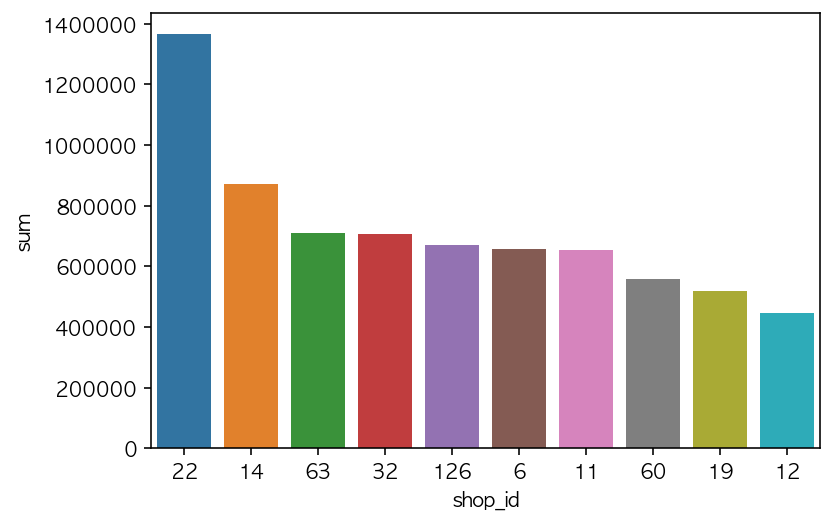

In [28]:
sns.barplot(data=top_table, x=top_table.index,
           y = 'sum',
           order=top_table.index)

### 4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.

In [32]:
order['timestamp'] = pd.to_datetime(order['timestamp'])

order.dtypes
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


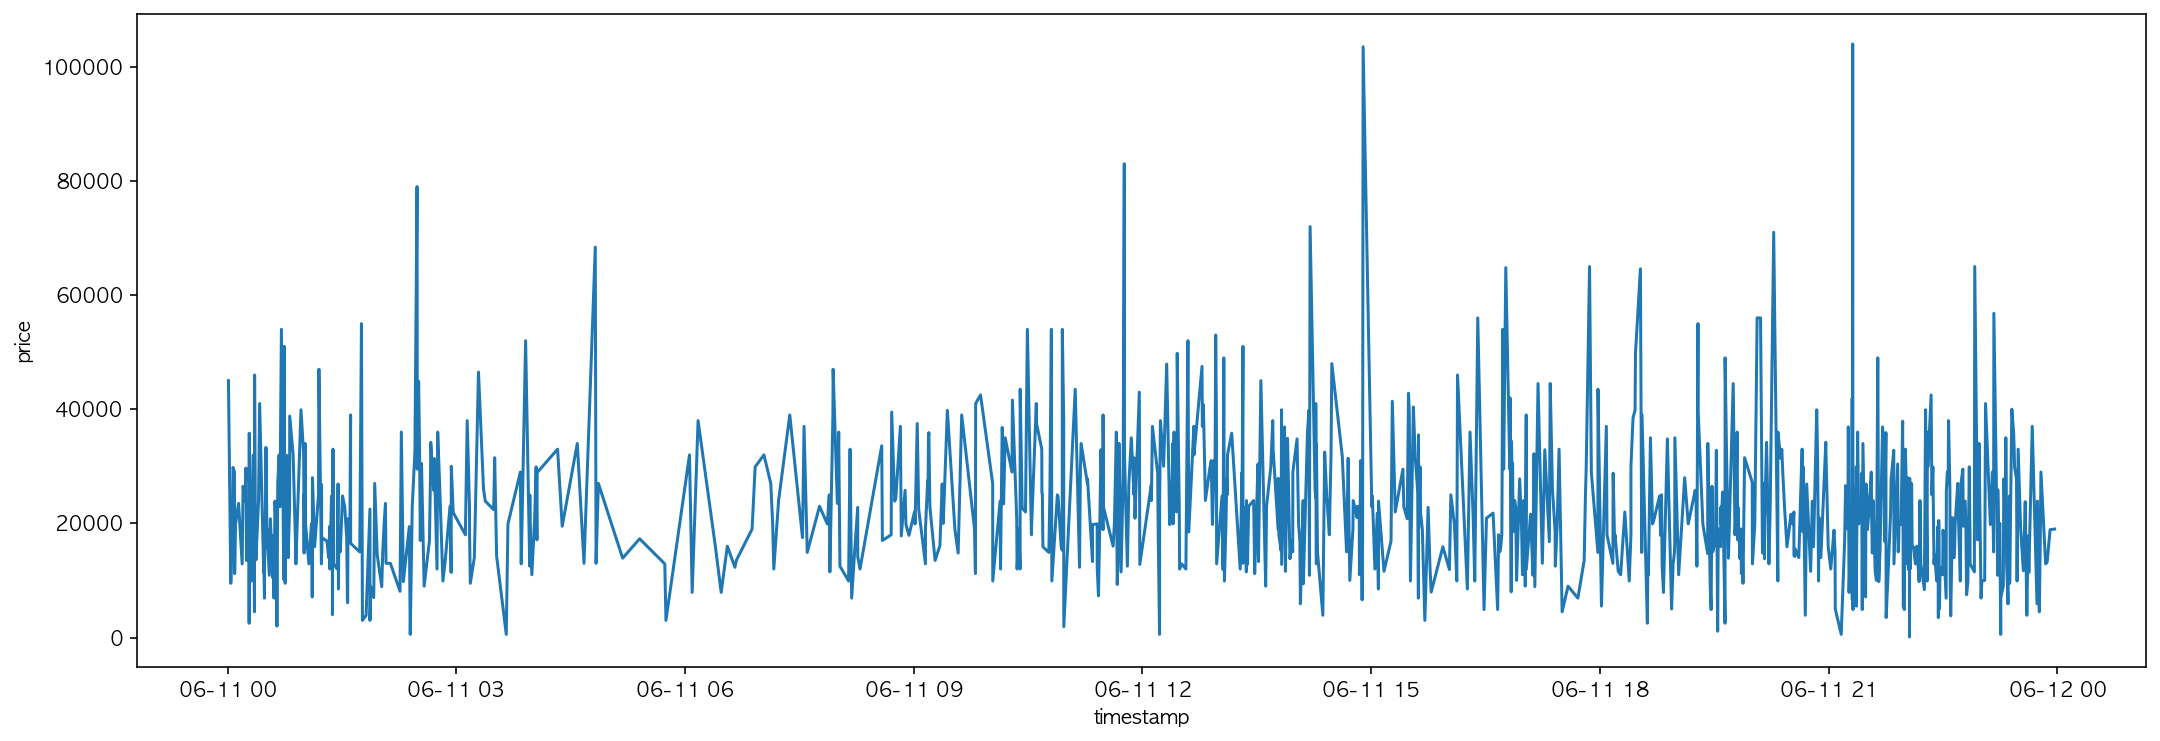

In [37]:
plt.figure(figsize = (18, 6))

sns.lineplot(data=order, x = 'timestamp',
            y='price')

### 5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.

In [38]:
order['hour'] = order['timestamp'].dt.hour

In [39]:
order_hour = pd.pivot_table(data=order,
                           index='hour',
                           values = 'price',
                           aggfunc ='sum')

order_hour.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


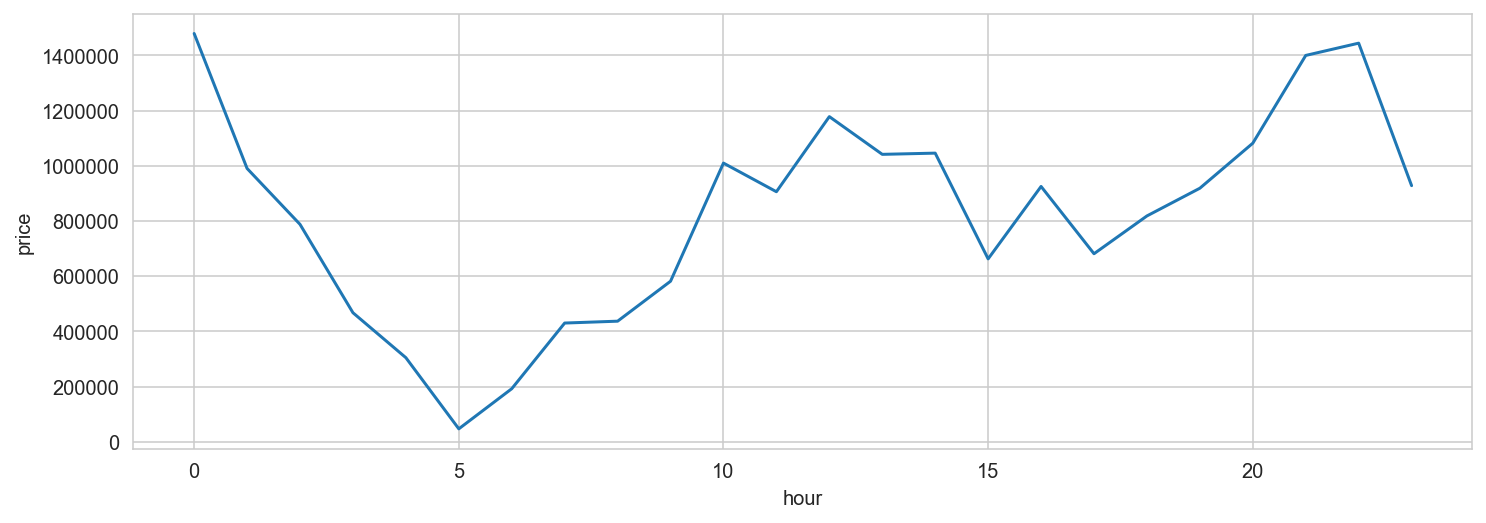

In [40]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.lineplot(data = order_hour, x = order_hour.index, y='price')

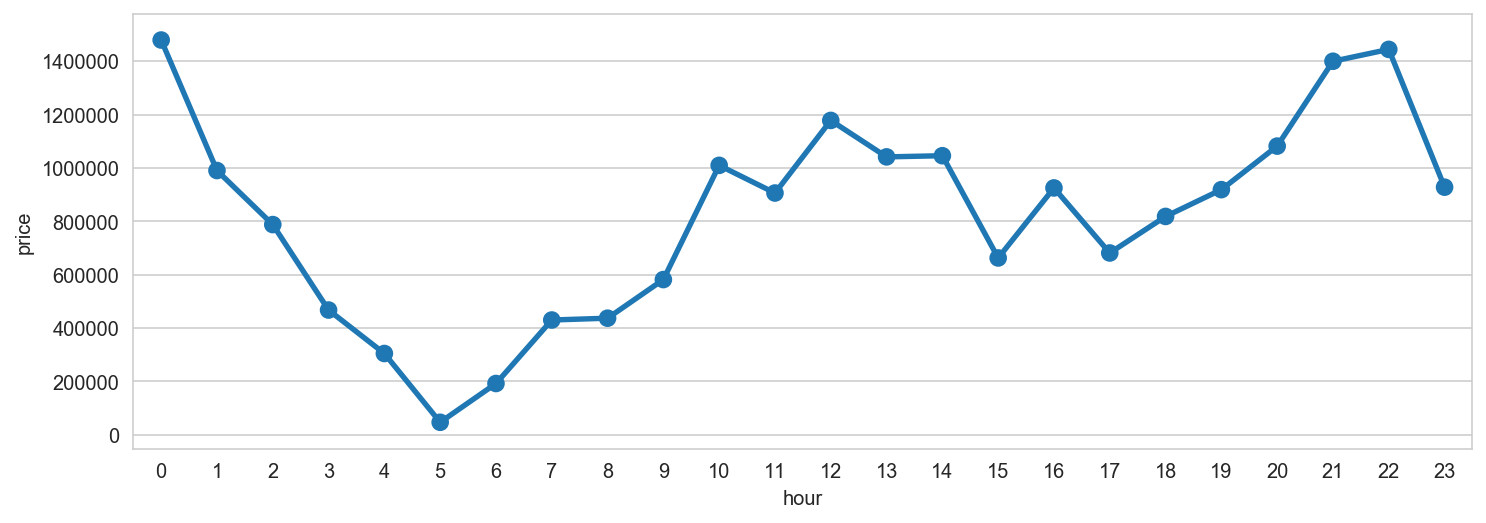

In [41]:
plt.figure(figsize=(12, 4))

sns.pointplot(data = order_hour, x = order_hour.index, y='price')

### 6 . user 테이블을 불러와 order 테이블과 병합해주세요.

In [102]:
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connection)
user.head(1)

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41


In [97]:
user.columns

user.head(1)

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41


In [98]:
order.head(1)

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0


In [101]:
merge_data = pd.merge(order, user, on ='user_id', how = 'inner')
merge_data.head(1)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39


### 7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.

In [139]:
merge_data.describe()

,goods_id,shop_id,price,hour,age
count,867.000000,867.000000,867.000000,867.000000,867.000000
mean,3053.961938,71.410611,22790.449827,12.884660,23.802768
std,2022.588039,55.095863,12782.616702,7.563623,8.514305
min,8.000000,1.000000,100.000000,0.000000,-1.000000
25%,1367.000000,22.000000,13400.000000,7.000000,19.000000
50%,2852.000000,63.000000,20000.000000,14.000000,24.000000
75%,4689.000000,122.500000,29900.000000,20.000000,29.500000
max,7136.000000,197.000000,104000.000000,23.000000,45.000000


In [143]:
merge_top10=merge_data.sort_values(by='price', ascending = False).head(10)

merge_top10['age'] = merge_top10['age'].replace (-1, 30)

merge_top10

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
698,2018-06-11 21:18:52.761,JOQxMBxTIvos7zCMvKhRigVwraV3j80i,4163,56,104000,21,And,41
461,2018-06-11 14:53:36.561,98NWnqNyLPNZQE6qzILV14uL-EgDn8QL,2277,48,103500,14,And,40
329,2018-06-11 11:45:40.070,PpNtElNzf364BK1bp5t9Mx73jJndxC6y,6503,26,83000,11,And,33
86,2018-06-11 02:29:07.664,dcOJ18dH3FKRVYxkZ-53m-mO6n2Za97n,3457,57,79000,2,And,39
432,2018-06-11 14:11:53.932,WLFHVuFN-ejNzcoRz4kz8pnFgHUBVFp5,1511,139,72000,14,iOS,20
649,2018-06-11 20:16:42.571,CvcnHE9Vy1k_-FETUzKaUV01__A0vVjD,7043,106,71000,20,And,30
187,2018-06-11 04:49:22.687,bGrPhTVk4E_GjVUD3WDdu9bkZqoK_1jl,1764,119,68400,4,And,34
816,2018-06-11 22:54:55.568,aJRq95PeiIEyugQrE3e8SYwKI_JOPE2i,4660,145,65000,22,iOS,25
555,2018-06-11 17:51:48.159,sQc6-oAdjeNC1X-TyE5tm6T_62I19lxU,1331,191,65000,17,And,35
513,2018-06-11 16:45:53.496,FPj4WoYzBkkhLv6icpJGgGrpvTqTvgpd,2645,160,64800,16,And,29


In [157]:
merge_top10.sort_values(by='price', ascending = False).head(10)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
698,2018-06-11 21:18:52.761,JOQxMBxTIvos7zCMvKhRigVwraV3j80i,4163,56,104000,21,And,41
461,2018-06-11 14:53:36.561,98NWnqNyLPNZQE6qzILV14uL-EgDn8QL,2277,48,103500,14,And,40
329,2018-06-11 11:45:40.070,PpNtElNzf364BK1bp5t9Mx73jJndxC6y,6503,26,83000,11,And,33
86,2018-06-11 02:29:07.664,dcOJ18dH3FKRVYxkZ-53m-mO6n2Za97n,3457,57,79000,2,And,39
432,2018-06-11 14:11:53.932,WLFHVuFN-ejNzcoRz4kz8pnFgHUBVFp5,1511,139,72000,14,iOS,20
649,2018-06-11 20:16:42.571,CvcnHE9Vy1k_-FETUzKaUV01__A0vVjD,7043,106,71000,20,And,30
187,2018-06-11 04:49:22.687,bGrPhTVk4E_GjVUD3WDdu9bkZqoK_1jl,1764,119,68400,4,And,34
816,2018-06-11 22:54:55.568,aJRq95PeiIEyugQrE3e8SYwKI_JOPE2i,4660,145,65000,22,iOS,25
555,2018-06-11 17:51:48.159,sQc6-oAdjeNC1X-TyE5tm6T_62I19lxU,1331,191,65000,17,And,35
513,2018-06-11 16:45:53.496,FPj4WoYzBkkhLv6icpJGgGrpvTqTvgpd,2645,160,64800,16,And,29


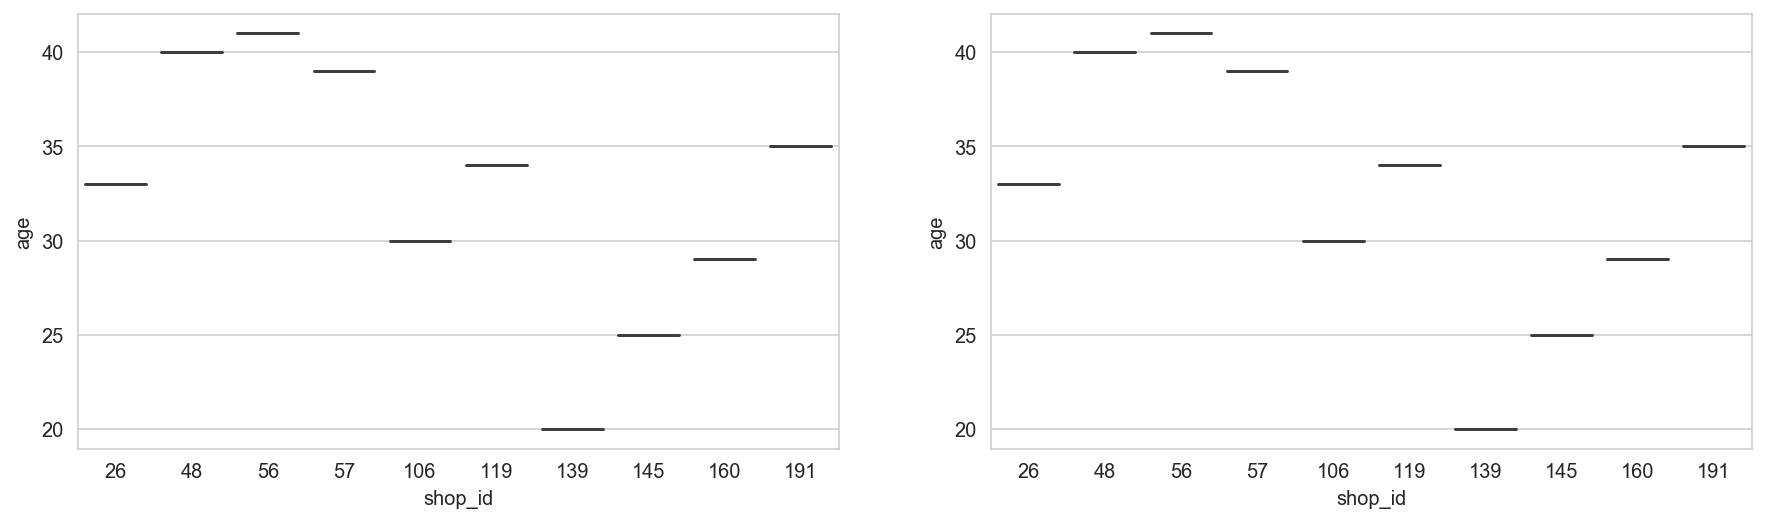

In [160]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 4)


sns.boxplot(data=merge_top10, x='shop_id', y = 'age', ax=ax1)
sns.violinplot(data=merge_top10, x='shop_id', y = 'age', ax=ax2)

In [163]:
merge_top10[['shop_id', 'age']]

,shop_id,age
698,56,41
461,48,40
329,26,33
86,57,39
432,139,20
649,106,30
187,119,34
816,145,25
555,191,35
513,160,29


In [164]:
merge_top10_pv = pd.pivot_table(by = 'shop_id', 
                               values = 'price',
                               aggfunc = 'sum')

TypeError: pivot_table() got an unexpected keyword argument 'by'